In [5]:
import numpy as np
import cv2 as cv
import math 
import skimage
from skimage import io, restoration,data
from matplotlib import pyplot as plt
img = data.camera()
plt.gray()

<Figure size 640x480 with 0 Axes>

# 

Enter intensity level: 2


Text(0.5, 1.0, 'Intensity reduced Image')

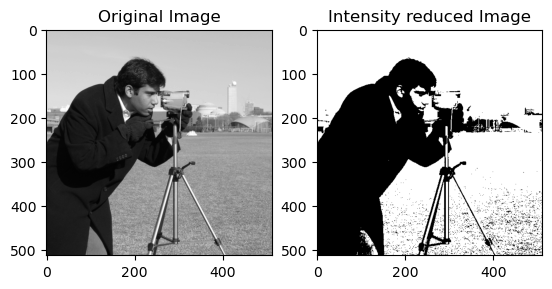

In [7]:
# input level
levels = int(input("Enter intensity level:"))


div = 255/(levels - 1)
img2 = np.round(img/div)*div

figure,arr= plt.subplots(1,2)
arr[0].imshow(img)
arr[0].set_title('Original Image')
arr[1].imshow(img2)
arr[1].set_title('Intensity reduced Image')

Text(0.5, 1.0, '20x20 Kernel')

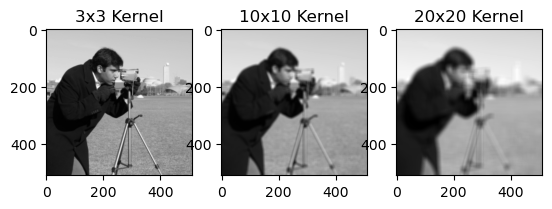

In [8]:
image3k = cv.blur(img,(3,3)) 
image10k = cv.blur(img,(10,10)) 
image20k = cv.blur(img,(20,20))

figure,arr= plt.subplots(1,3)

arr[0].imshow(cv.blur(img,(3,3)))
arr[0].set_title('3x3 Kernel')

arr[1].imshow(cv.blur(img,(10,10)) )
arr[1].set_title('10x10 Kernel')

arr[2].imshow(cv.blur(img,(20,20)) )
arr[2].set_title('20x20 Kernel')


Text(0.5, 1.0, '90 degree rotated')

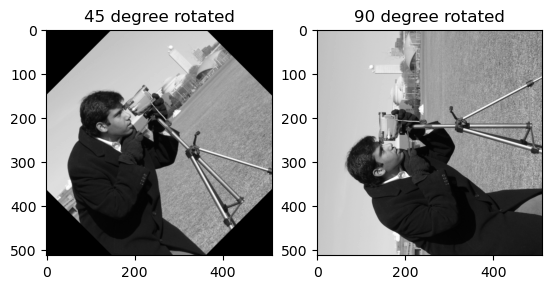

In [10]:
(h, w) = img.shape[:2]
(cX, cY) = (w // 2, h // 2)

M = cv.getRotationMatrix2D((cX, cY), 45, 1.0)
img_45degree = cv.warpAffine(img, M, (w, h))

M = cv.getRotationMatrix2D((cX, cY), 90, 1.0)
img_90degree = cv.warpAffine(img, M, (w, h))

fig,arr= plt.subplots(1,2)


arr[0].imshow(img_45degree)
arr[0].set_title('45 degree rotated')

arr[1].imshow(img_90degree)
arr[1].set_title('90 degree rotated')

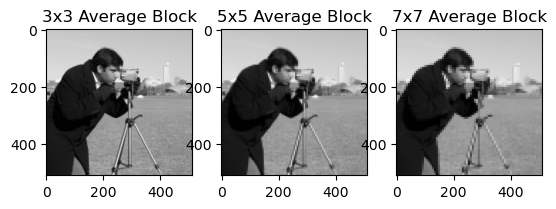

In [13]:
STRIDE = (3,5,7)
im = img
rows,cols = im.shape

f, axarr = plt.subplots(1, len(STRIDE))
for i,S in enumerate(STRIDE):
    im_mod = im.copy()
    for r in range(int(S/2),rows,S):
        for c in range(int(S/2),cols,S):
            im_mod[r-int(S/2):r+int(S/2)+1,c-int(S/2):c+int(S/2)+1] = np.average(im[r-int(S/2):r+int(S/2)+1,c-int(S/2):c+int(S/2)+1])
    axarr[i].imshow(im_mod);
    axarr[i].set_title('{}x{} Average Block'.format(S,S))